# Machine-Learning

## Überwachtes Lernen

### Regressionsgerade mit Bias

###### Schulmensa; wie viele Essen sollten vorbereitet werden?

Stell dir eine Schule mit Ganztagsbetrieb vor, in der es eine Mensa gibt, die Mittags viele Essensportionen zubereitet. 

Die Schule hat dazu einige Wünsche ausgearbeitet:
1. Jede Schülerin, jeder Schüler kann mittags dort essen.
2. Es wird gewünscht, dass man sich einen Tag im voraus zum Essen anmeldet, jedoch
    - In besonderen Fällen kann man auch unangemeldet dort erscheinen und ein Essen bekommen, sofern genügend Portionen bereitet wurden.
    
In der Vergangenheit hat das auch einigermaßen geklappt, doch in der letzten Zeit ist es immer mal wieder zu Problemen gekommen:
- es waren zu wenig Portionen vorbereitet, da bedingt durch schlechtes Wetter viele Kinder unangemeldet kamen.
- es waren zu viele Portionen vorbereitet, da einige Klassen unvorhergesehen eine Exkursion machten.

Die Organisatoren der Mensa haben auf der Basis der vergangenen 3 Monate eine Tabelle erstellt, aus der man ersehen kann, wie viele Kinder am Tag zuvor zum Essen angemeldet hatten und wie viele Essen tatsächlich herausgegeben wurden.

Es könnte sich dabei vielleicht die folgende Tabelle ergeben (nur der Anfag ist hier wiedergegeben):

Meldungen| Portionen
---: | ---:
271 | 310
 65 |  94
217 | 227
291 | 335
139 | 157
165 | 185
226 | 251
124 | 141
142 | 156
256 | 294
116 | 147
109 | 144

Natürlich könntest jetzt du raten (oder klug interpolieren), um deine richtige Größe zu finden. Doch wir wollen ein Programm erstellen, das einen allgemeinen Zusammenhang zwischen den Tabellenspalten aus den Beispielen ***lernt***.

Dazu lassen wir die Daten (in einer Datei mit dem Namen **mensa.txt** abgelegt) in ein Koordinatensystem eintragen:

In [1]:
# Das ist eine Bibliothek, mir der man Zeichnungen anfertigen kann
import matplotlib.pyplot as plt

# Das ist eine Bibliothek, mir der man Listen verwalten kann
import numpy as np


In [6]:
def zeigen_1(datname):
    x_left, x_right, y_left, y_right = 0, 310, 50, 360 # Grenzen der Koordinatenachsen

    plt.axis([x_left, x_right, y_left, y_right]) # Achsen zeichnen
    plt.xticks(fontsize=15) # Unterteilung der x-Achse
    plt.yticks(fontsize=15) # Unterteilung der y-Achse
    plt.xlabel("Meldungen", fontsize=18) # Beschriftung der x-Achse
    plt.ylabel("Ausgegeben", fontsize=18) # Beschriftung der y-Achse

    # Die Datei wird eingelesen und die beiden Spalten als Listen in X und Y abgelegt. 
    # Die erste Zeile der Datei wird überlesen
    X, Y = np.loadtxt (datname, skiprows=1, unpack=True)

    plt.plot (X, Y, "r.") # die Daten werden als rote Punkte dargestellt
    plt.show() # Die Graphik wird angezeigt

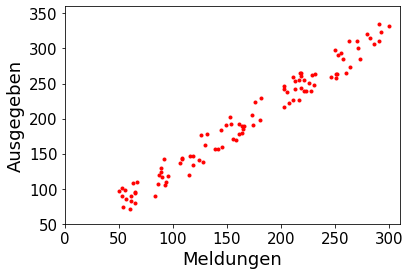

In [7]:
zeigen_1 ("mensa.txt")

Man erkennt irgendwie einen Zusammenhang! Aber
1. Ist der Zusammenhang in einer Art *Formel* auszudrücken?
2. Und kann auch der Computer diesen Zusammenhang entdecken?

Es scheint so, als ob ungefähr eine Gerade geeignet wäre, den Zusammenhang auszudrücken. Jedoch - im Gegensatz zu dem Problem im vorigen Kapitel - scheint diese Gerade **nicht** durch den Koordinatenursprung zu verlaufen! Dazu bekommt die gesuchte Gerade einen sogenannten ***Bias***:

Also:
> Eine Gerade mit Bias $b$ und Steigung $m$ hat die Gradengleichung $y = m\cdot x + b$

Das können wir als Python-Funktion ausdrücken (dabei kann der Parameter X sogar eine ganze Liste von Zahlen sein):

In [8]:
def vorhersage (X, m, b):
    return X*m + b

Wir können ja die Werte von $m$ und $b$ wie gehabt raten und die Gerade anschießend einzeichnen.

Probier doch mit den Werten von $m$ und $b$ ein wenig herum!

In [27]:
def zeigen_2 (datname, m, b):
    x_left, x_right, y_left, y_right = -1, 310, -1, 360 # Grenzen der Koordinatenachsen

    plt.axis([x_left, x_right, y_left, y_right]) # Achsen zeichnen
    plt.xticks(fontsize=15) # Unterteilung der x-Achse
    plt.yticks(fontsize=15) # Unterteilung der y-Achse
    plt.xlabel("Meldungen", fontsize=18) # Beschriftung der x-Achse
    plt.ylabel("Ausgegeben", fontsize=18) # Beschriftung der y-Achse

    # Die Datei wird eingelesen und die beiden Spalten als Listen in X und Y abgelegt. 
    # Die erste Zeile der Datei wird überlesen
    X, Y = np.loadtxt (datname, skiprows=1, unpack=True)

    plt.plot (X, Y, "r.") # die Daten werden als rote Punkte dargestellt
    plt.plot ([0, x_right], [vorhersage(0, m, b), vorhersage(x_right, m, b)], linewidth=1.0, color="b")
    plt.show() # Die Graphik wird angezeigt

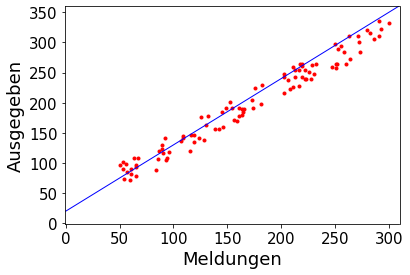

In [29]:
zeigen_2 ("mensa.txt", 1.1, 20)

Nehmen wir jetzt einmal an, wir haben die Daten mit m = 1.2 und b = 20 getestet. Das scheint noch nicht gut zu passen! Also berechnen wir wie gehabt den mittleren *Fehler*.

In [30]:
MELDUNG, AUSGABE = np.loadtxt ("mensa.txt", skiprows=1, unpack=True)

Und wie im letzten Kapitel berechnen wir den mittleren quadratischen Fehler:

In [31]:
def fehler (X, Y, m, b):
    return np.average ((vorhersage (X, m, b) - Y)**2)

Die Idee besteht jetzt wiederum darin, die Werte von m und b so zu verändern, dass der Fehler möglichst gering wird. 

Dazu beginnt man mit willkürlichen Werten für m und b und verändert diese Werte schrittweise nach oben bzw. unten, bis eine Veränderung keinen Fortschritt mehr bringt.

In [36]:
def training (X, Y, iterations, lr):
    m = 0
    b = 0
    for i in range(iterations):
        aktuellerFehler = fehler(X, Y, m, b)
        #print("w: %.3f =>Iteration: %4d => Loss: %.6f" % (m, i, current_loss))

        if fehler (X, Y, m + lr, b) < aktuellerFehler:
            m += lr
        elif fehler (X, Y, m - lr, b) < aktuellerFehler:
            m -= lr
        elif fehler (X, Y, m, b + lr) < aktuellerFehler:
            b += lr
        elif fehler (X, Y, m, b - lr) < aktuellerFehler:
            b -= lr
    return m, b

In [69]:
training (MELDUNG, AUSGABE, 100000, 0.001)

(0.9940000000000007, 28.931000000012375)

In [ ]:
#import seaborn as sns

In [ ]:
#sns.set()

In [67]:
def zeigen_3 (datname, it, lr):
    X, Y = np.loadtxt (datname, skiprows=1, unpack=True)
    m, b = training (X, Y, it, lr)
    #sns.set()
    plt.plot(X, Y, "r.")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Meldungen (M)", fontsize=18) # Beschriftung der x-Achse
    plt.ylabel("Ausgegeben (A)", fontsize=18) # Beschriftung der y-Achse
    x_left, x_right, y_left, y_right = 0, 310, 0, 360
    plt.axis([x_left, x_right, y_left, y_right])
    wert_links = vorhersage(x_left, m, b)
    wert_rechts = vorhersage(x_right, m, b)
    plt.plot([0, x_right], [b, wert_rechts], linewidth=1.0, color="k")
    plt.show()
    print("Der Zusammenhang ist etwa A = %.3f * M + %.3f" %(m, b))


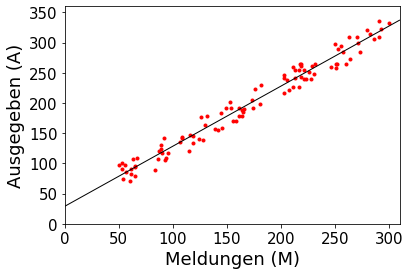

Der Zusammenhang ist etwa A = 0.994 * M + 28.931


In [68]:
zeigen_3 ("mensa.txt", 100000, 0.001)

Wie viele Portionen muss der Koch der Mensaküche jetzt herstellen, wenn sich z.B. 230 Kinder bereits angemeldet haben?

In [70]:
steigung, bias = training (MELDUNG, AUSGABE, 100000, 0.001)

In [73]:
def anzahlEssen (anzahlMeldungen):
    return int (vorhersage (anzahlMeldungen, steigung, bias))

In [74]:
anzahlEssen (230)

257